In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#서울의 유동인구  데이터 불러오기 및 열추출
s = '/content/drive/MyDrive/covid19/DATATHON01/해커톤 코로나 데이터셋/SeoulFloating.csv'
ft = pd.read_csv(s)
ft = ft[['sex','birth_year','fp_num']]
ft = ft.rename(columns={'birth_year':'age'})
ft

,sex,age,fp_num
0,female,20,19140
1,male,20,19950
2,female,20,25450
3,male,20,27050
4,female,20,28880
...,...,...,...
1084795,female,40,27620
1084796,female,40,56560
1084797,female,50,38960
1084798,female,60,25420


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# index(연령별-성별) 유동인구 확인
ft = ft.groupby(['age','sex']).mean()
ft_gender_age =ft
ft_gender_age

fp_num
age sex                 
20  female  30686.069912
    male    29510.497566
30  female  33154.557190
    male    33980.606416
40  female  33451.815155
    male    33524.952876
50  female  32490.283186
    male    30294.449447
60  female  21747.356195
    male    19249.624447
70  female  18011.777987
    male    13021.592478

In [8]:
# 인덱스 풀고 열로 다시 정렬하기
ft_gender_age.reset_index(inplace=True, drop=False)
ft_gender_age

,age,sex,fp_num
0,20,female,30686.069912
1,20,male,29510.497566
2,30,female,33154.557190
3,30,male,33980.606416
4,40,female,33451.815155
5,40,male,33524.952876
6,50,female,32490.283186
7,50,male,30294.449447
8,60,female,21747.356195
9,60,male,19249.624447


In [9]:
#환자정보 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt

patient = pd.read_csv('/content/drive/MyDrive/covid19/DATATHON01/해커톤 코로나 데이터셋/PatientInfo.csv')
patient


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [10]:
# 칼람정리
patient = patient[['sex','age', 'confirmed_date']]
patient

,sex,age,confirmed_date
0,male,50s,2020-01-23
1,male,30s,2020-01-30
2,male,50s,2020-01-30
3,male,20s,2020-01-30
4,female,20s,2020-01-31
...,...,...,...
5160,female,30s,2020-05-30
5161,NaN,NaN,2020-06-16
5162,NaN,NaN,2020-06-18
5163,NaN,NaN,2020-06-18


In [11]:
# 결측치 제거단계 1
import numpy as np


patient = patient.replace(np.nan,0)
patient

,sex,age,confirmed_date
0,male,50s,2020-01-23
1,male,30s,2020-01-30
2,male,50s,2020-01-30
3,male,20s,2020-01-30
4,female,20s,2020-01-31
...,...,...,...
5160,female,30s,2020-05-30
5161,0,0,2020-06-16
5162,0,0,2020-06-18
5163,0,0,2020-06-18


In [12]:
# 결측치 제거단계 2
patient = patient[patient['sex']!=0]
patient

,sex,age,confirmed_date
0,male,50s,2020-01-23
1,male,30s,2020-01-30
2,male,50s,2020-01-30
3,male,20s,2020-01-30
4,female,20s,2020-01-31
...,...,...,...
5156,male,30s,2020-04-03
5157,female,20s,2020-04-03
5158,female,10s,2020-04-14
5159,female,30s,2020-05-09


In [13]:
# 결측치 제거단계3
patient = patient[patient['age']!=0]
patient

,sex,age,confirmed_date
0,male,50s,2020-01-23
1,male,30s,2020-01-30
2,male,50s,2020-01-30
3,male,20s,2020-01-30
4,female,20s,2020-01-31
...,...,...,...
5156,male,30s,2020-04-03
5157,female,20s,2020-04-03
5158,female,10s,2020-04-14
5159,female,30s,2020-05-09


In [14]:
# index(연령별-성별) 확진자수 확인
patient = patient.groupby([ 'age','sex']).count()
patient

confirmed_date
age  sex                   
0s   female              28
     male                38
100s female               1
10s  female              68
     male               110
20s  female             457
     male               440
30s  female             242
     male               281
40s  female             307
     male               210
50s  female             404
     male               263
60s  female             270
     male               212
70s  female             144
     male                88
80s  female             114
     male                56
90s  female              33
     male                16

In [15]:
# 인덱스를 다시 열로 정렬
patient.reset_index(inplace=True, drop=False)
patient

,age,sex,confirmed_date
0,0s,female,28
1,0s,male,38
2,100s,female,1
3,10s,female,68
4,10s,male,110
5,20s,female,457
6,20s,male,440
7,30s,female,242
8,30s,male,281
9,40s,female,307


In [16]:
# 안쓰는 연령 제거
patient = patient[patient['age']!='0s']
patient = patient[patient['age']!='80s']
patient = patient[patient['age']!='90s']
patient = patient[patient['age']!='100s']
patient = patient[patient['age']!='10s']

In [17]:
# 연령대에 붙은 s제거 (숫자만 있게끔)
patient["age"] = patient["age"].str.replace('s', '', regex=True)


In [18]:
patient

,age,sex,confirmed_date
5,20,female,457
6,20,male,440
7,30,female,242
8,30,male,281
9,40,female,307
10,40,male,210
11,50,female,404
12,50,male,263
13,60,female,270
14,60,male,212


In [19]:
ft_gender_age

,age,sex,fp_num
0,20,female,30686.069912
1,20,male,29510.497566
2,30,female,33154.557190
3,30,male,33980.606416
4,40,female,33451.815155
5,40,male,33524.952876
6,50,female,32490.283186
7,50,male,30294.449447
8,60,female,21747.356195
9,60,male,19249.624447


In [20]:
# ft_gender_age에 열 추가합니다 (위의 patient 데이터 프레임 참고해서 )

ft_gender_age.loc[:,'positive'] = [457, 440, 242, 281, 307, 210, 404, 263, 270, 212, 144, 88] 
ft_gender_age

,age,sex,fp_num,positive
0,20,female,30686.069912,457
1,20,male,29510.497566,440
2,30,female,33154.557190,242
3,30,male,33980.606416,281
4,40,female,33451.815155,307
5,40,male,33524.952876,210
6,50,female,32490.283186,404
7,50,male,30294.449447,263
8,60,female,21747.356195,270
9,60,male,19249.624447,212


In [21]:
# 인덱스값을 변경
ft_gender_age = ft_gender_age.rename(index={0:'20-Female',1:'20-Male',2:'30-Female',3:'30-Male',4:'40-Female',
                                            5:'40-Male',6:'50-Female',7:'50-Male',8:'60-Female',
                                           9:'60-Male',10:'70-Female',11:'70-Male'})
del ft_gender_age['age']
del ft_gender_age['sex']

ft_gender_age

,fp_num,positive
20-Female,30686.069912,457
20-Male,29510.497566,440
30-Female,33154.557190,242
30-Male,33980.606416,281
40-Female,33451.815155,307
40-Male,33524.952876,210
50-Female,32490.283186,404
50-Male,30294.449447,263
60-Female,21747.356195,270
60-Male,19249.624447,212


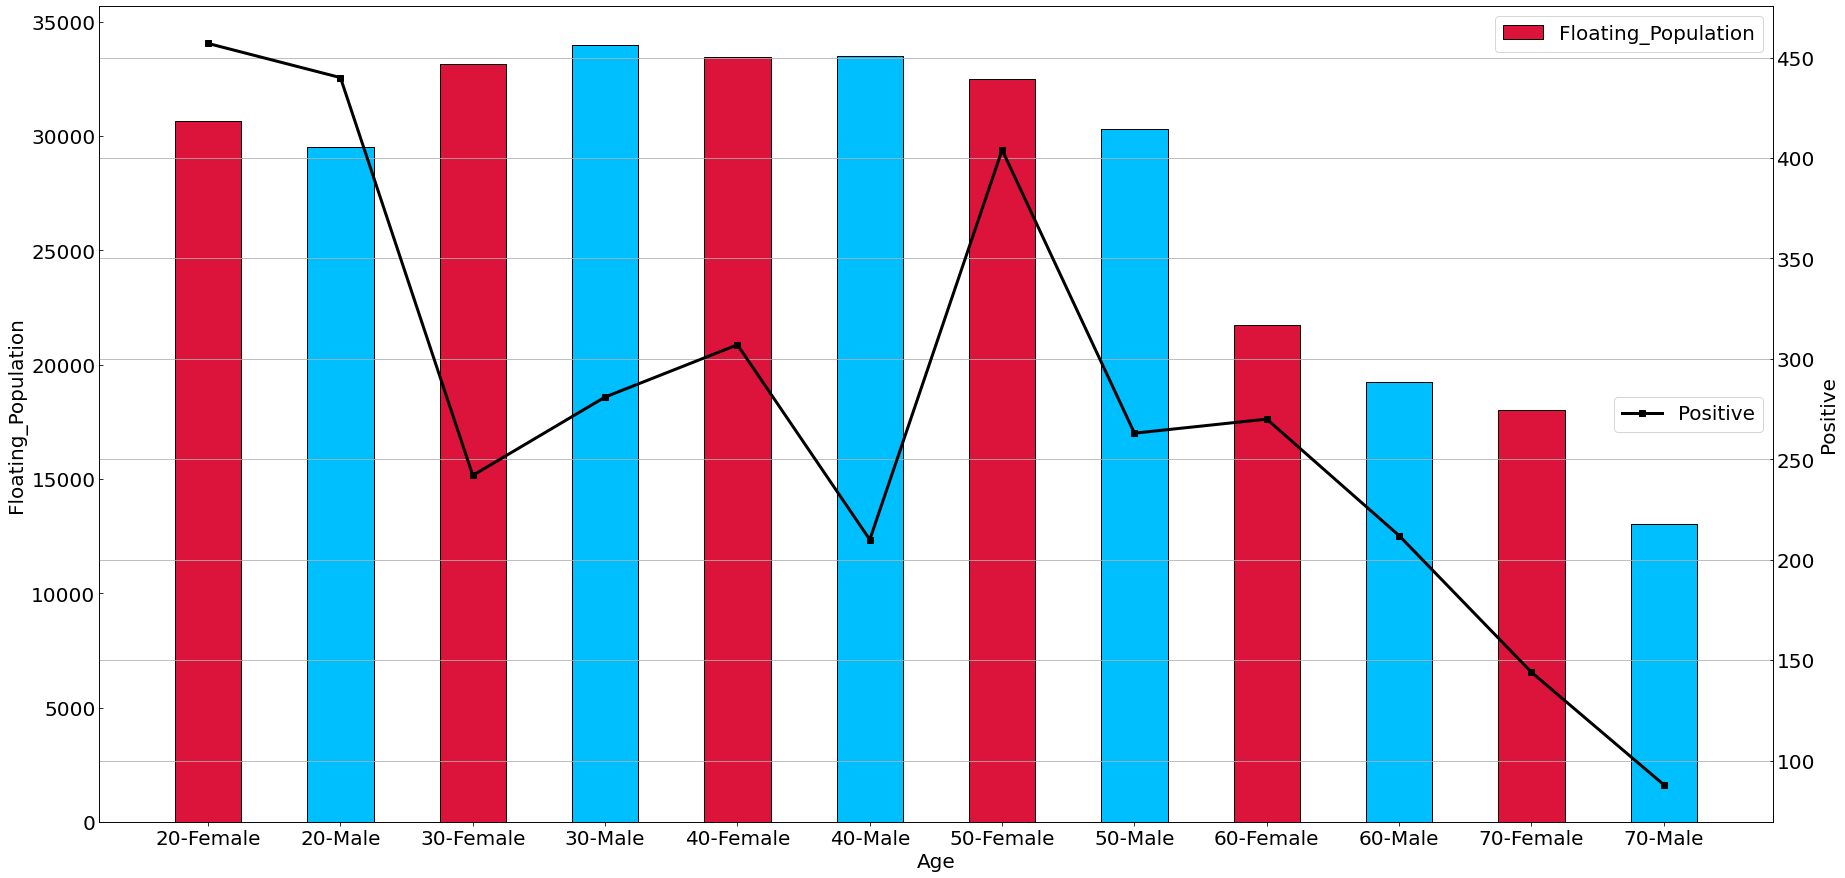

In [22]:
#연령별 성별 확진자수와 유동인구 상관관계 시각화 

plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['font.size'] = 20

x = ft_gender_age.index
y1 = ft_gender_age['fp_num']
y2 = ft_gender_age['positive']

fig, ax1 = plt.subplots() 
colors = ['crimson','deepskyblue'] 

ax1.bar(x, y1, color=colors, width=0.5,label='Floating_Population', edgecolor='black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Floating_Population') 
ax1.tick_params(axis='y', direction='in') 
ax2 = ax1.twinx()
ax2.plot(x, y2, '-s', color='black',linewidth=3,label='Positive') 
ax2.set_ylabel('Positive')
ax2.tick_params(axis='both', direction='in') 
ax1.legend(loc='best')
ax2.legend(loc='right')
plt.grid() 
plt.show()